In [1]:
library(faraway)
library(car)
library(MASS)
library(lmtest)
library(tidyverse)
library(nlme)

Loading required package: carData


Attaching package: ‘car’


The following objects are masked from ‘package:faraway’:

    logit, vif


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


── Attaching packages ───────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ dplyr::select() masks MASS::select()
✖ purrr::some()   masks car::some()


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse




In [6]:
df_pigs <- read_table("pig_weight.txt")
df_pigs$Drug <- as.factor(df_pigs$Drug)
pig_model1 <- lm(Pigweight ~ ., data = df_pigs)
summary(pig_model1)
pig_model1$coefficients[1] + pig_model1$coefficients[2]
pig_model1$coefficients[1] + pig_model1$coefficients[3]


── Column specification ──────────────────────────────────────────────────────────────────────────────
cols(
  Drug = col_double(),
  Momweight = col_double(),
  Dadweight = col_double(),
  Pigweight = col_double()
)




Call:
lm(formula = Pigweight ~ ., data = df_pigs)

Residuals:
   Min     1Q Median     3Q    Max 
-3.905 -1.174  0.187  1.351  3.657 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.48163    9.14917   0.818  0.41628    
Drug2       -1.60557    0.52788  -3.042  0.00331 ** 
Drug3       -0.70480    0.52871  -1.333  0.18684    
Momweight    0.26363    0.04727   5.578 4.28e-07 ***
Dadweight    0.17442    0.03465   5.034 3.58e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.855 on 70 degrees of freedom
Multiple R-squared:  0.4561,	Adjusted R-squared:  0.425 
F-statistic: 14.67 on 4 and 70 DF,  p-value: 9.393e-09


(Intercept) 
   5.876066

(Intercept) 
   6.776831

Part a

$ y = \beta_0 + \beta_1 x_1 +  \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \epsilon$

$x_1$ -> Whether drug 2 was administered  
$x_2$ -> Whether drug 3 was administered  
$x_3$ -> Mom weight  
$x_4$ -> Dad weight

|*Drug*|$E(y | x)$|
|-|-|
|1|7.48 - 0.264 $x_3$ + 0.174 $x_4$|
|2|5.88 - 0.264 $x_3$ + 0.174 $x_4$|
|3|6.78 - 0.264 $x_3$ + 0.174 $x_4$|

In [8]:
# Part c
new_pig <- tibble(Drug = as.factor(2), Momweight = 140, Dadweight = 185)

predict(pig_model1, newdata = new_pig, interval = "prediction", level = 0.95)

,fit,lwr,upr
1,75.05263,71.15725,78.94801


In [47]:
# Part d
cbind(
summary(pig_model1)$coefficient[,1] - qt(0.95, 68) * summary(pig_model1)$coefficient[,2],
summary(pig_model1)$coefficient[,1] + qt(0.95, 68) * summary(pig_model1)$coefficient[,2])

confint(pig_model1, level = 0.9)

(Intercept),-7.7752656,22.7385283
Drug2,-2.4858376,-0.7252930
Drug3,-1.5864659,0.1768660
Momweight,0.1848135,0.3424510
Dadweight,0.1166420,0.2322017


,5 %,95 %
(Intercept),-7.7692473,22.7325099
Drug2,-2.4854904,-0.7256403
Drug3,-1.5861182,0.1765182
Momweight,0.1848446,0.3424199
Dadweight,0.1166648,0.2321789


In [10]:
#Part e
anova(pig_model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Drug,2,23.71834,11.859169,3.447315,3.733113e-02
Momweight,1,91.03867,91.038667,26.463821,2.342272e-06
Dadweight,1,87.17500,87.174999,25.340700,3.580316e-06
Residuals,70,240.80826,3.440118,NA,NA


Part e. i)  
$H_0: \beta_0 = \beta_1 = \beta_2 = 0 $  
$H_A: \beta_0 \neq 0 \text{ or } \beta_1 \neq 0 \text{ or } \beta_2 \neq 0 $ 

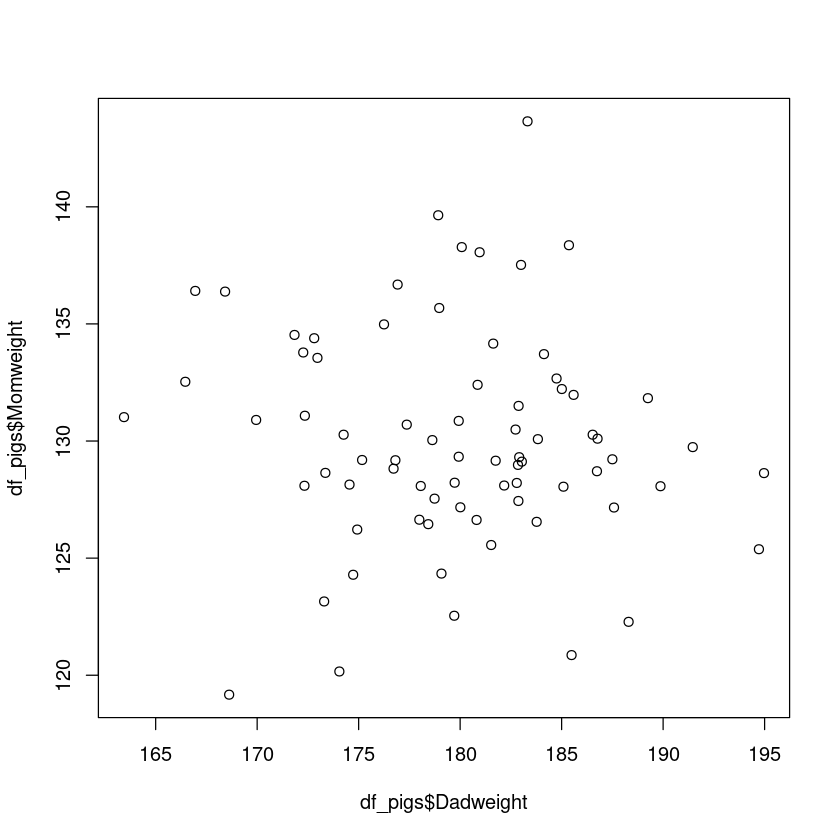

In [12]:
#Part ii

plot(df_pigs$Momweight ~ df_pigs$Dadweight)

In [23]:
-1.606 + c(1,-1) * qt(0.95, 68) * 0.528

[1] -0.7255218 -2.4864782

In [46]:
names(pig_model1)
cbind(
summary(pig_model1)$coefficient[,1] - qt(0.95, 68) * summary(pig_model1)$coefficient[,2],
summary(pig_model1)$coefficient[,1] + qt(0.95, 68) * summary(pig_model1)$coefficient[,2])
confint(pig_model1, level = 0.90)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "contrasts"     "xlevels"       "call"          "terms"        
[13] "model"

(Intercept),-7.7752656,22.7385283
Drug2,-2.4858376,-0.7252930
Drug3,-1.5864659,0.1768660
Momweight,0.1848135,0.3424510
Dadweight,0.1166420,0.2322017


,5 %,95 %
(Intercept),-7.7692473,22.7325099
Drug2,-2.4854904,-0.7256403
Drug3,-1.5861182,0.1765182
Momweight,0.1848446,0.3424199
Dadweight,0.1166648,0.2321789


In [35]:
summary(pig_model1)$coefficient[,1]

(Intercept)       Drug2       Drug3   Momweight   Dadweight 
  7.4816313  -1.6055653  -0.7048000   0.2636323   0.1744219

In [36]:
summary(pig_model1)$coefficient[,2]

(Intercept)       Drug2       Drug3   Momweight   Dadweight 
 9.14916679  0.52787655  0.52871229  0.04726554  0.03464907

In [37]:
summary(pig_model1)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),7.4816313,9.14916679,0.8177391,4.162810e-01
Drug2,-1.6055653,0.52787655,-3.0415545,3.311102e-03
Drug3,-0.7048000,0.52871229,-1.3330501,1.868378e-01
Momweight,0.2636323,0.04726554,5.5776841,4.282202e-07
Dadweight,0.1744219,0.03464907,5.0339547,3.580316e-06


In [51]:
pig_model_nodrug <- lm(Pigweight ~ Momweight + Dadweight, data = df_pigs)
pig_model_noparent <- lm(Pigweight ~ Drug, data = df_pigs)

anova(pig_model_nodrug, pig_model1)
anova(pig_model_noparent, pig_model1)

anova(pig_model1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,72,272.7022,NA,NA,NA,NA
2,70,240.8083,2,31.89399,4.635595,0.01286451


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,72,419.0219,NA,NA,NA,NA
2,70,240.8083,2,178.2137,25.90226,3.803752e-09


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Drug,2,23.71834,11.859169,3.447315,3.733113e-02
Momweight,1,91.03867,91.038667,26.463821,2.342272e-06
Dadweight,1,87.17500,87.174999,25.340700,3.580316e-06
Residuals,70,240.80826,3.440118,NA,NA


In [52]:
summary(pig_model_noparent)


Call:
lm(formula = Pigweight ~ Drug, data = df_pigs)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4812 -1.7438  0.0812  1.7138  4.6112 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  73.1512     0.4825 151.614   <2e-16 ***
Drug2        -1.2724     0.6823  -1.865   0.0663 .  
Drug3        -1.0932     0.6823  -1.602   0.1135    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.412 on 72 degrees of freedom
Multiple R-squared:  0.05357,	Adjusted R-squared:  0.02728 
F-statistic: 2.038 on 2 and 72 DF,  p-value: 0.1378


In [53]:
summary(pig_model1)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),7.4816313,9.14916679,0.8177391,4.162810e-01
Drug2,-1.6055653,0.52787655,-3.0415545,3.311102e-03
Drug3,-0.7048000,0.52871229,-1.3330501,1.868378e-01
Momweight,0.2636323,0.04726554,5.5776841,4.282202e-07
Dadweight,0.1744219,0.03464907,5.0339547,3.580316e-06


In [59]:
delta_2_3 <- summary(pig_model1)$coefficient[2,1] - summary(pig_model1)$coefficient[3,1]

SE_delta <- summary(pig_model1)$coefficient[2,2] + summary(pig_model1)$coefficient[3,2]

t_cv <- qt(0.95, 68)

delta_2_3 + c(-1, 1) * SE_delta * t_cv

[1] -2.6627036  0.8611729